In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Preparation

In [2]:
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

### Feature Engineering

In [4]:
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['price_total'] = df['Quantity']*df['UnitPrice']

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
year                0
month               0
price_total         0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df.duplicated().sum()

5225

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(401604, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   year         401604 non-null  int64         
 9   month        401604 non-null  int64         
 10  price_total  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 36.8+ MB


In [11]:
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,price_total
436782,574240,23189,SET OF 12 FORK CANDLES,2,2011-11-03 12:45:00,2.89,15998.0,United Kingdom,2011,11,5.78


In [12]:
df.groupby('Country').describe()

Quantity                                               \
                         count       mean         std      min    25%   50%   
Country                                                                       
Australia               1258.0  66.488871   97.712803   -120.0   6.00  24.0   
Austria                  401.0  12.037406   21.745485    -48.0   6.00   9.0   
Bahrain                   17.0  15.294118   24.959379      2.0   6.00   6.0   
Belgium                 2069.0  11.189947   13.601441    -12.0   4.00  10.0   
Brazil                    32.0  11.125000    8.476723      2.0   3.00  10.0   
Canada                   151.0  18.298013   46.682587      1.0   6.00  12.0   
Channel Islands          757.0  12.513871   22.584559     -2.0   4.00  10.0   
Cyprus                   611.0  10.304419   23.444786    -33.0   2.00   5.0   
Czech Republic            30.0  19.733333   22.813990    -24.0  12.00  24.0   
Denmark                  389.0  21.048843   27.402502    -25.0  12.00  12.0   
EIRE                    7475.0  18.218997   42.040305   -288.0   4.00  10.0   
European Community        61.0   8.147541    6.546847     -2.0   3.00   6.0   
Finland                  695.0  15.346763   21.001421    -27.0   6.00  10.0   
France                  8475.0  12.956460   21.473831   -250.0   5.00  10.0   
Germany                 9480.0  12.377743   17.876026   -288.0   5.00  10.0   
Greece                   146.0  10.657534    7.724067     -1.0   5.25  10.0   
Iceland                  182.0  13.505495   18.856172      2.0   6.00  12.0   
Israel                   247.0  16.141700   16.749959    -32.0   4.00  12.0   
Italy                    803.0   9.961395   13.579809    -12.0   4.00   6.0   
Japan                    358.0  70.441341  177.191079   -624.0   4.00  36.0   
Lebanon                   45.0   8.577778    4.314294      2.0   6.00   8.0   
Lithuania                 35.0  18.628571   10.137542      6.0  12.00  16.0   
Malta                    127.0   7.433071    8.069726     -4.0   3.00   6.0   
Netherlands             2371.0  84.406580  111.369151   -480.0  16.00  72.0   
Norway                  1086.0  17.722836   22.644876    -12.0   6.00  12.0   
Poland                   341.0  10.712610   10.174628     -6.0   4.00  10.0   
Portugal                1471.0  10.888511   11.931942    -12.0   4.00  10.0   
RSA                       58.0   6.068966    3.329096      1.0   3.00   6.0   
Saudi Arabia              10.0   7.500000    5.720334     -5.0   6.00   9.0   
Singapore                229.0  22.855895   27.742886     -1.0   8.00  12.0   
Spain                   2528.0  10.607991   24.150780   -288.0   3.00   6.0   
Sweden                   461.0  77.292842  128.987626   -240.0   8.00  20.0   
Switzerland             1877.0  15.864678   19.293265   -120.0   6.00  12.0   
USA                      291.0   3.553265   16.450545    -36.0 -10.00   5.0   
United Arab Emirates      68.0  14.441176   12.474909      1.0   6.00  12.0   
United Kingdom        356728.0  11.198644  264.998044 -80995.0   2.00   4.0   
Unspecified              241.0   7.406639    8.925653      1.0   1.00   2.0   

                                     UnitPrice              ... month        \
                        75%      max     count        mean  ...   75%   max   
Country                                                     ...               
Australia              96.0   1152.0    1258.0    3.217806  ...   8.0  12.0   
Austria                12.0    288.0     401.0    4.243192  ...  10.0  12.0   
Bahrain                 8.0     96.0      17.0    4.644118  ...   5.0   5.0   
Belgium                12.0    272.0    2069.0    3.644335  ...  10.0  12.0   
Brazil                 18.0     24.0      32.0    4.456250  ...   4.0   4.0   
Canada                 20.0    504.0     151.0    6.030331  ...   7.0   8.0   
Channel Islands        12.0    407.0     757.0    4.936460  ...  10.0  12.0   
Cyprus                 12.0    288.0     611.0    6.350311  ...  11.0  

In [13]:
df_sorted = df.groupby(["Country"])["price_total"].sum().sort_values(ascending = False).reset_index()[:10]

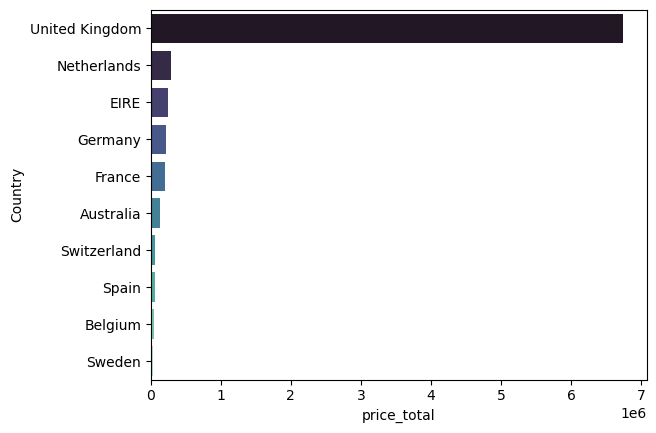

In [14]:
sns.barplot(y='Country', x='price_total', data=df_sorted,palette='mako');

In [15]:
df = df[["CustomerID", "Quantity", "UnitPrice", "year", "month", "price_total", "Country"]]

In [16]:
df = pd.get_dummies(df, columns=["Country"] )

In [17]:
df.sample()

,CustomerID,Quantity,UnitPrice,year,month,price_total,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
208265,18231.0,2,1.25,2011,5,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CustomerID                    401604 non-null  float64
 1   Quantity                      401604 non-null  int64  
 2   UnitPrice                     401604 non-null  float64
 3   year                          401604 non-null  int64  
 4   month                         401604 non-null  int64  
 5   price_total                   401604 non-null  float64
 6   Country_Australia             401604 non-null  uint8  
 7   Country_Austria               401604 non-null  uint8  
 8   Country_Bahrain               401604 non-null  uint8  
 9   Country_Belgium               401604 non-null  uint8  
 10  Country_Brazil                401604 non-null  uint8  
 11  Country_Canada                401604 non-null  uint8  
 12  Country_Channel Islands       401604 non-nul

### PCA

In [19]:
pca = PCA(n_components=6)

In [20]:
df_pca = pca.fit_transform(df)

In [21]:
pca.components_

array([[-9.99999660e-01,  5.35978919e-04,  1.83662066e-04,
         5.09669180e-06, -5.95278575e-05,  5.89627842e-04,
         3.00315291e-06,  9.37963849e-07,  4.21692805e-08,
         4.99936074e-06,  6.81360338e-08, -2.61075680e-07,
         2.52198184e-07,  1.48926747e-06,  6.35723304e-08,
         9.04909369e-07,  3.37364386e-06,  8.95269513e-09,
         1.62826615e-06,  1.87025620e-05,  2.11753965e-05,
         1.88556883e-07,  4.52619824e-07,  5.48819261e-07,
         1.79186469e-06,  7.65691400e-07,  9.60070058e-08,
        -1.50758717e-09, -1.84592345e-07,  1.73017519e-06,
         2.61705671e-06,  7.36460723e-07,  3.16031249e-06,
         1.39374336e-07,  2.30214309e-08,  4.92456280e-07,
         5.08887830e-06,  2.26539109e-07,  4.15891001e-06,
         6.56639612e-07,  1.70933102e-08, -7.94089475e-05,
         3.16095133e-07],
       [-7.73041640e-04, -4.85865150e-01,  1.44681806e-02,
         1.36599748e-09,  1.31581090e-05, -8.73913685e-01,
        -1.32244578e-06, -7.89

In [22]:
pca.explained_variance_ratio_ 

array([9.20790301e-01, 7.52619906e-02, 2.71769893e-03, 1.22627362e-03,
       3.65943329e-06, 2.86267997e-08])

In [23]:
np.sum([9.15172816e-01, 5.66809757e-02, 2.80848480e-02, 6.03520250e-05,
       3.97953345e-07, 3.04674714e-07])

0.999999694353059

In [24]:
pca.get_feature_names_out() 

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5'], dtype=object)

In [25]:
df = pd.DataFrame(df_pca, columns=pca.get_feature_names_out())

In [26]:
df

,pca0,pca1,pca2,pca3,pca4,pca5
0,-2568.845203,5.648767,-2.352361,0.545966,-4.272887,-0.100090
1,-2568.842077,1.256395,-4.162043,2.427272,-4.273033,-0.099996
2,-2568.840144,-1.175291,-3.578731,1.472367,-4.272993,-0.100015
3,-2568.842077,1.256395,-4.162043,2.427272,-4.273033,-0.099996
4,-2568.842077,1.256395,-4.162043,2.427272,-4.273033,-0.099996
...,...,...,...,...,...,...
401599,2601.153040,11.162559,2.559675,-4.868130,-4.555484,-0.785952
401600,2601.151469,11.998442,-2.668752,-0.958226,-4.555533,-0.785831
401601,2601.153132,9.504177,-5.080849,2.529313,-4.555808,-0.785688
401602,2601.153132,9.504177,-5.080849,2.529313,-4.555808,-0.785688


In [27]:
list_of_inirties = []
silhouette_avg = []
for n in range(1, len(df.columns)+1):
    km = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit_predict(df)
    list_of_inirties.append(km.inertia_)
    
    

In [28]:
list_of_inirties

[1281330564840.0173,
 401123477360.7996,
 232186634027.13608,
 171836294735.97437,
 129610002313.43207,
 87413847049.04329]

### Elbow

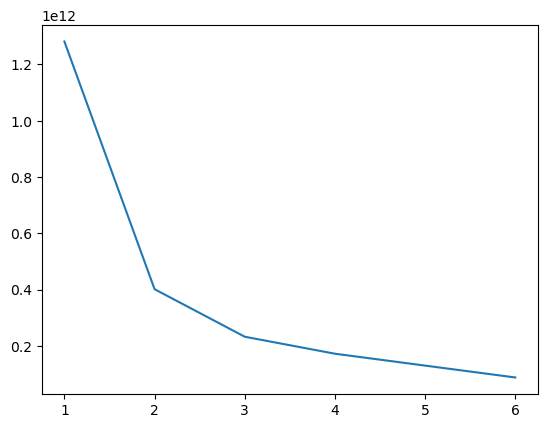

In [29]:
plt.plot(range(1, len(df.columns)+1), list_of_inirties);

### K-means Clustering

In [30]:
km = KMeans(n_clusters=2, init = 'k-means++', random_state = 42)

In [31]:
df_predict = km.fit_predict(df)

In [ ]:
print(f'Silhouette Score(n=2): {silhouette_score(df, df_predict)}')

In [32]:
df['cluster'] = df_predict

In [33]:
df['cluster'].value_counts()

1    215275
0    186329
Name: cluster, dtype: int64

In [34]:
df.sample()

,pca0,pca1,pca2,pca3,pca4,pca5,cluster
256460,-1628.845729,7.35262,-3.776438,7.352295,-1.30589,-0.019519,0


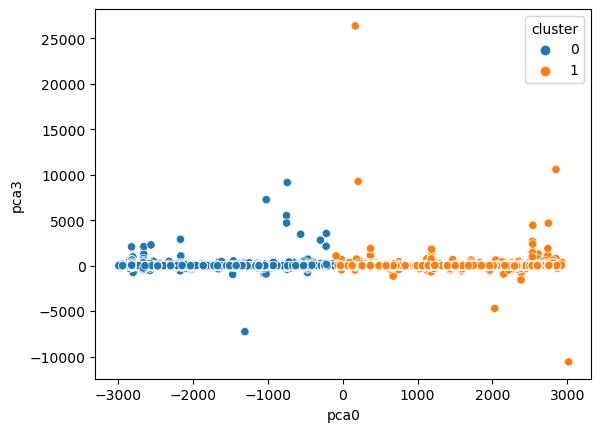

In [35]:
sns.scatterplot(x='pca0', y ='pca3', hue='cluster', data=df);

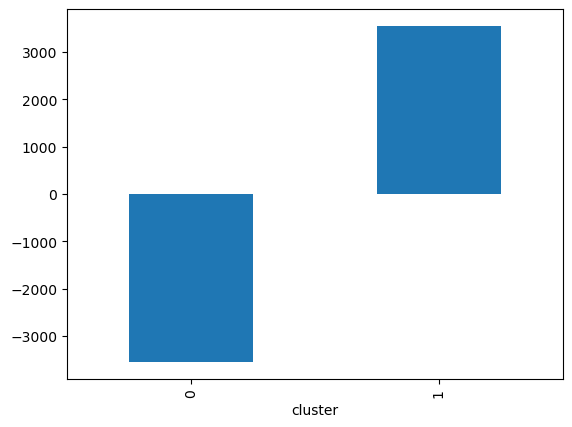

In [37]:
df.groupby('cluster')['pca5'].sum().plot(kind='bar');

###  Evaluation 

In [ ]:
print(f'Silhouette Score(n=2): {silhouette_score(df, df_predict)}')

### Personalization and Recommendations

1- It is recommended to increase the quantities of products in stores in countries that consume the most products, such as Netherlands, Germany, France, and the United Kingdom.

2- It is recommended to improve the promotion of more products in areas where purchasing is weak

3- Sending an email to customers to inform them of the latest offers

### Interpretation and Insights

1 - We advise customers in the lower clustering to provide them with more services and distribute the shops more widely

2 - We recommend offering coupons to those with the largest clustering, thus increasing purchases